In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# define filepath to read data
dir_path = './Data/'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+'PM_train.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path+'PM_test.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path+'PM_truth.txt'), sep='\s+', header=None, names=['RUL'])

# inspect first few rows
train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [3]:
train[index_names].describe()
train[index_names].groupby('unit_nr').max().describe()

time_cycles
count   100.000000
mean    206.310000
std      46.342749
min     128.000000
25%     177.000000
50%     199.000000
75%     229.250000
max     362.000000

In [4]:
train[sensor_names].describe().transpose()

count         mean           std        min        25%        50%  \
s_1   20631.0   518.670000  6.537152e-11   518.6700   518.6700   518.6700   
s_2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
s_3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
s_4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
s_5   20631.0    14.620000  3.394700e-12    14.6200    14.6200    14.6200   
s_6   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
s_7   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
s_8   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
s_9   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
s_10  20631.0     1.300000  4.660829e-13     1.3000     1.3000     1.3000   
s_11  20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
s_12  20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
s_13  20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
s_14  20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
s_15  20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
s_16  20631.0     0.030000  1.556432e-14     0.0300     0.0300     0.0300   
s_17  20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
s_18  20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
s_19  20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
s_20  20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
s_21  20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

            75%        max  
s_1    518.6700   518.6700  
s_2    643.0000   644.5300  
s_3   1594.3800  1616.9100  
s_4   1414.5550  1441.4900  
s_5     14.6200    14.6200  
s_6     21.6100    21.6100  
s_7    554.0100   556.0600  
s_8   2388.1400  2388.5600  
s_9   9069.4200  9244.5900  
s_10     1.3000     1.3000  
s_11    47.7000    48.5300  
s_12   521.9500   523.3800  
s_13  2388.1400  2388.5600  
s_14  8148.3100  8293.7200  
s_15     8.4656     8.5848  
s_16     0.0300     0.0300  
s_17   394.0000   400.0000  
s_18  2388.0000  2388.0000  
s_19   100.0000   100.0000  
s_20    38.9500    39.4300  
s_21    23.3668    23.6184

In [5]:
# Calculate the mean and maximum values for each sensor
means = train.mean()
maximums = train.max()


# Compare the means to the maximums for each sensor and print the results if the mean value is equal to the max value (with a significance of 3 digits)
for i in range(1, 22):
    sensor_mean = round(means[f"s_{i}"], 5)
    sensor_max = round(maximums[f"s_{i}"], 5)
    
    if sensor_mean == sensor_max:
        print(f"Sensor s_{i} has a mean value of {sensor_mean} which is equal to its maximum value of {sensor_max}.")


Sensor s_1 has a mean value of 518.67 which is equal to its maximum value of 518.67.
Sensor s_5 has a mean value of 14.62 which is equal to its maximum value of 14.62.
Sensor s_10 has a mean value of 1.3 which is equal to its maximum value of 1.3.
Sensor s_16 has a mean value of 0.03 which is equal to its maximum value of 0.03.
Sensor s_18 has a mean value of 2388.0 which is equal to its maximum value of 2388.0.
Sensor s_19 has a mean value of 100.0 which is equal to its maximum value of 100.0.


In [6]:
# Calculate the range (difference between max and min) for each sensor
ranges = maximums - train.min()

# Sort the sensors by range in descending order
sorted_sensors = ranges.sort_values(ascending=False)

# Print the sensors with the highest fluctuation (in descending order)
print("Sensors with the highest fluctuation:")
for i in range(1, 22):
    sensor_name = f"s_{i}"
    sensor_range = round(ranges[sensor_name], 3)
    print(f"Sensor {sensor_name} has a range of {sensor_range}.")


Sensors with the highest fluctuation:
Sensor s_1 has a range of 0.0.
Sensor s_2 has a range of 3.32.
Sensor s_3 has a range of 45.87.
Sensor s_4 has a range of 59.24.
Sensor s_5 has a range of 0.0.
Sensor s_6 has a range of 0.01.
Sensor s_7 has a range of 6.21.
Sensor s_8 has a range of 0.66.
Sensor s_9 has a range of 222.86.
Sensor s_10 has a range of 0.0.
Sensor s_11 has a range of 1.68.
Sensor s_12 has a range of 4.69.
Sensor s_13 has a range of 0.68.
Sensor s_14 has a range of 193.78.
Sensor s_15 has a range of 0.26.
Sensor s_16 has a range of 0.0.
Sensor s_17 has a range of 12.0.
Sensor s_18 has a range of 0.0.
Sensor s_19 has a range of 0.0.
Sensor s_20 has a range of 1.29.
Sensor s_21 has a range of 0.724.


In [7]:
print(train.columns)

Index(['unit_nr', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1',
       's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11',
       's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20',
       's_21'],
      dtype='object')


In [8]:
def add_remaining_useful_life(df):
    max_cycle = df.groupby("unit_nr")["time_cycles"].max()
    df = df.join(max_cycle, on="unit_nr", rsuffix="_max")
    df["RUL"] = df["time_cycles_max"] - df["time_cycles"]
    df.drop("time_cycles_max", axis=1, inplace=True)
    return df

# Add remaining useful life column
train = add_remaining_useful_life(train)


In [9]:
train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...     s_13     s_14    s_15  s_16  s_17  s_18  \
0  1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   392  2388   
1  1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   392  2388   
2  1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   390  2388   
3  1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   392  2388   
4  1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   393  2388   

    s_19   s_20     s_21  RUL  
0  100.0  39.06  23.4190  191  
1  100.0  39.00  23.4236  190  
2  100.0  38.95  23.3442  189  
3  100.0  38.88  23.3739  188  
4  100.0  38.90  23.4044  187  

[5 rows x 27 columns]

In [10]:
# group train by 'unit_nr' and compute maximum 'RUL'
df_max_rul = train.groupby('unit_nr')['RUL'].max().reset_index()

# rename the column to 'max_rul'
df_max_rul = df_max_rul.rename(columns={'RUL': 'max_rul'})


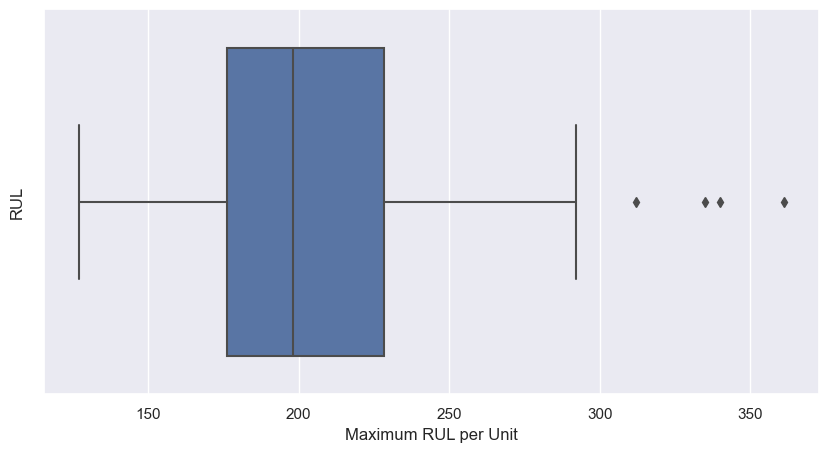

In [11]:
# Create a box plot of the maximum RUL for each unit
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="max_rul", data=df_max_rul, ax=ax)
ax.set_xlabel("Maximum RUL per Unit")
ax.set_ylabel("RUL")
plt.show()

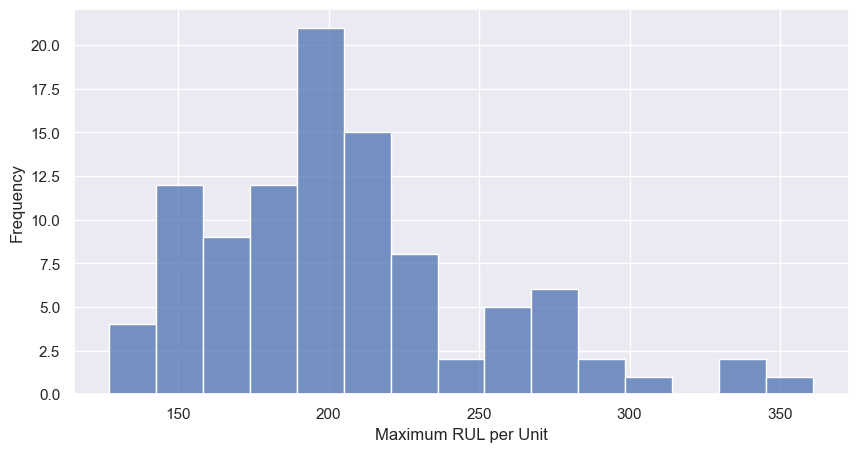

In [12]:
# Create a histogram of the maximum RUL for each unit
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x="max_rul", data=df_max_rul, bins=15, ax=ax)
ax.set_xlabel("Maximum RUL per Unit")
ax.set_ylabel("Frequency")
plt.show()

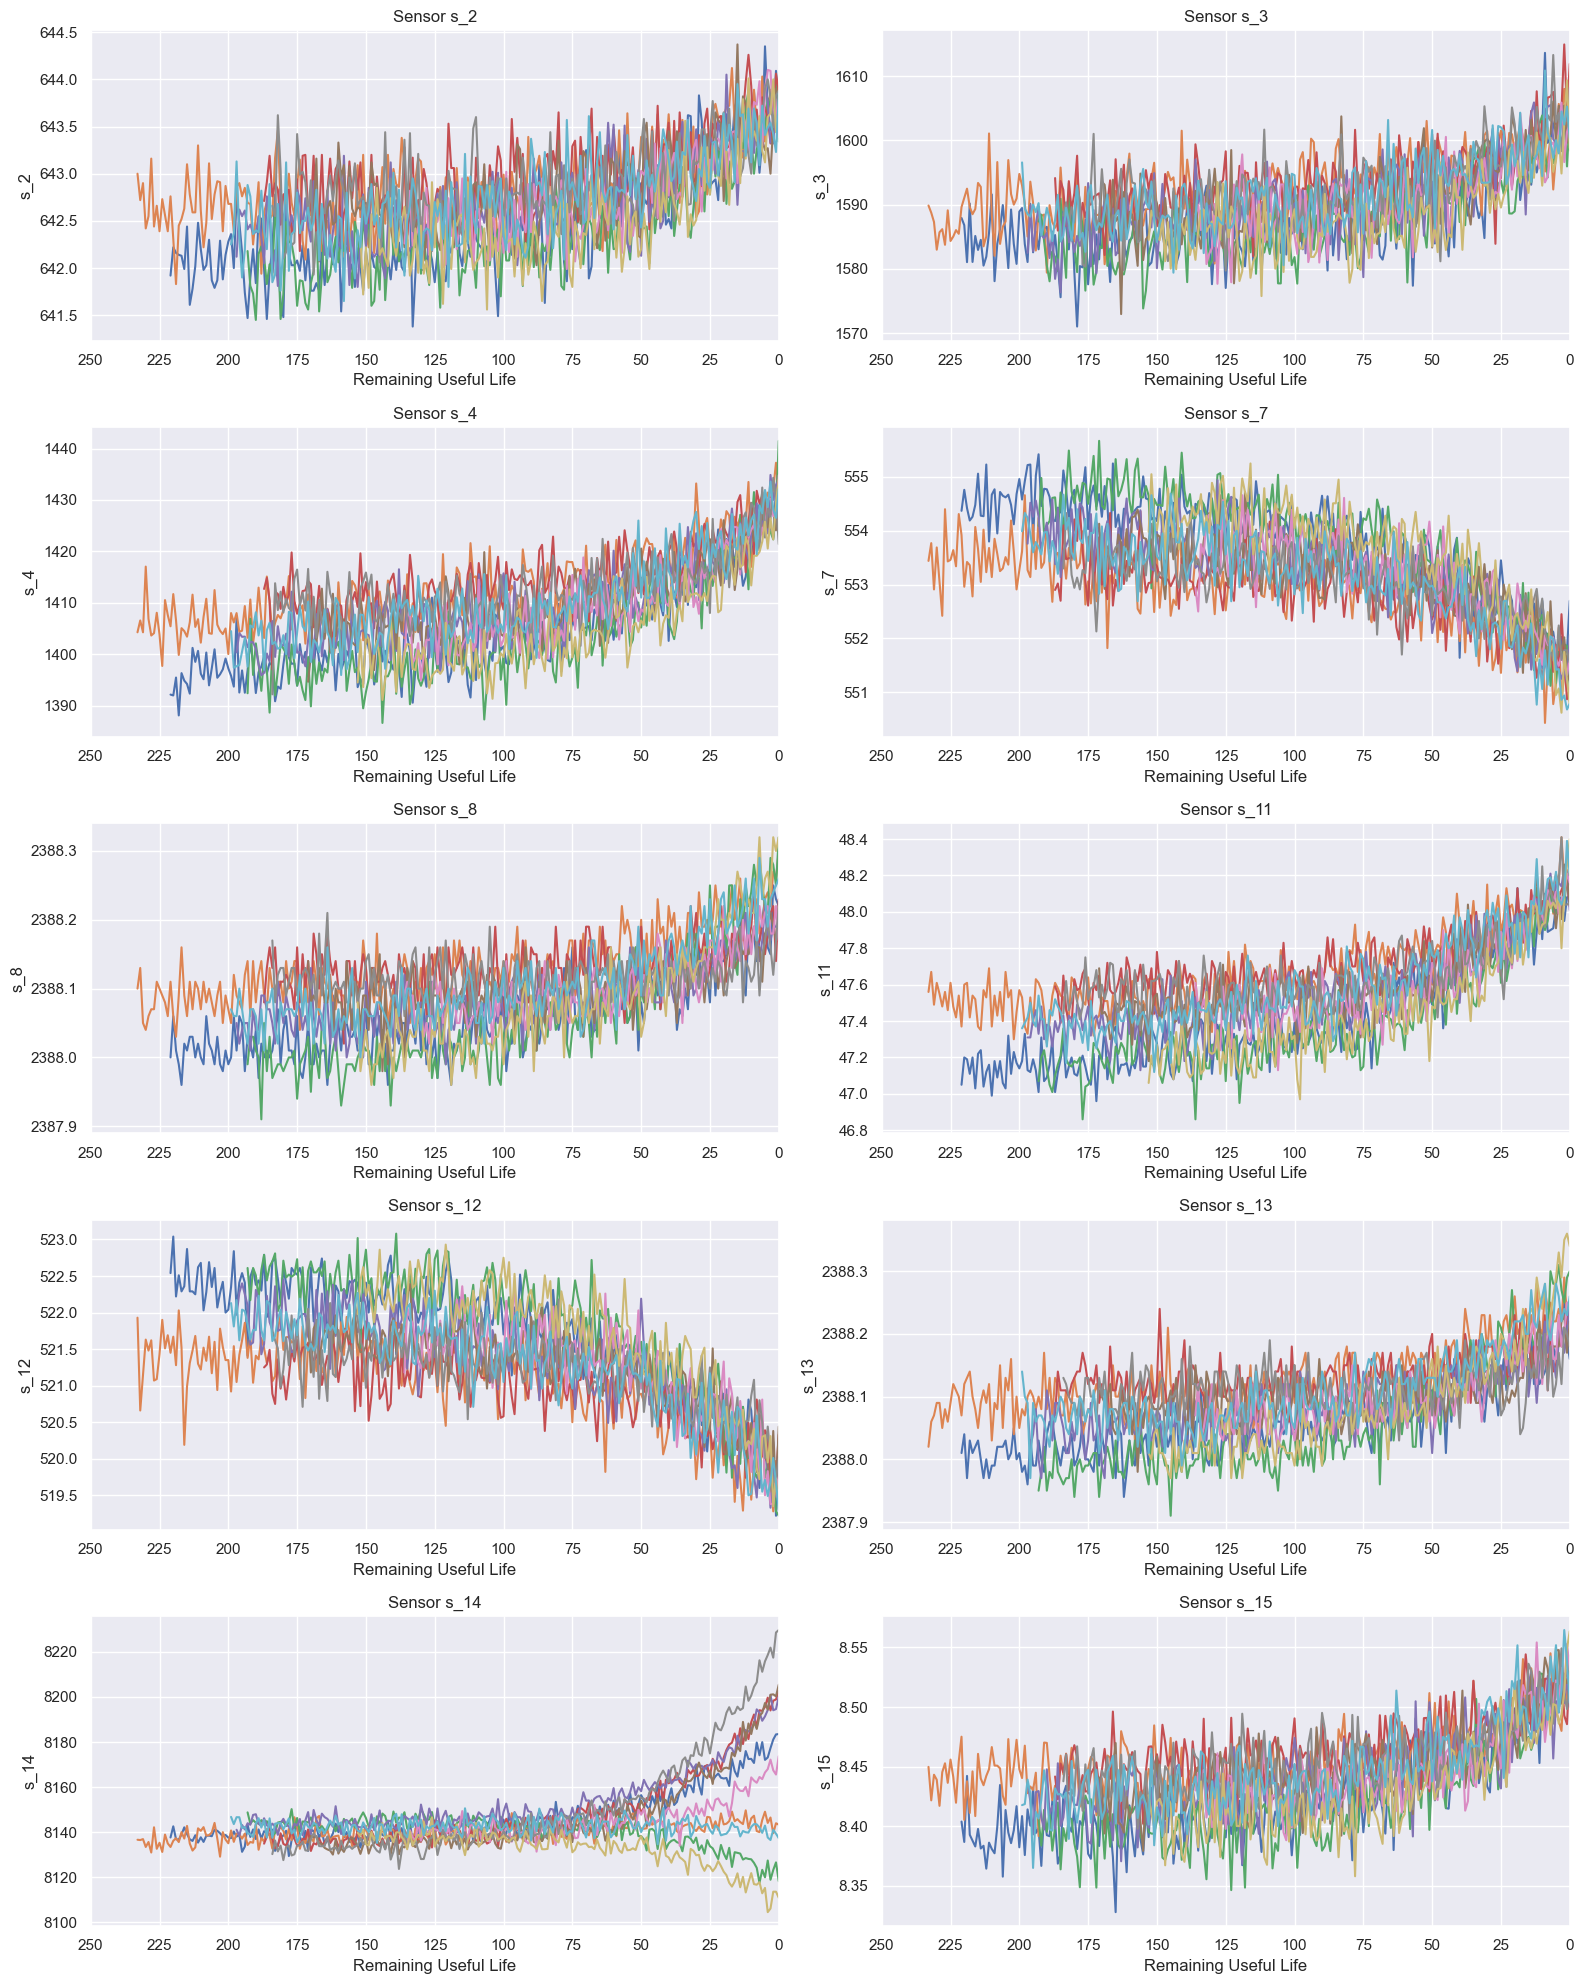

In [13]:
# Define the list of sensors to plot
sensors_to_plot = ['s_2', 's_3', 's_4', 's_7', 's_8', 's_11', 's_12', 's_13', 's_14', 's_15']

# Create a figure with 5 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))

# Loop over the sensors and plot each one in a separate subplot
for ax, sensor_name in zip(axes.flat, sensors_to_plot):
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):
            ax.plot('RUL', sensor_name, data=train[train['unit_nr']==i])
    ax.set_xlim(250, 0)
    ax.set_xticks(np.arange(0, 275, 25))
    ax.set_ylabel(sensor_name)
    ax.set_xlabel('Remaining Useful Life')
    ax.set_title(f'Sensor {sensor_name}')

# Adjust the spacing between the subplots and show the figure
fig.tight_layout()
plt.show()


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# extract the feature matrix X and the target variable y from the dataset
X = train.drop(['RUL'], axis=1)
X = X.drop( ['unit_nr', 'time_cycles', 'setting_1', 'setting_2', 'setting_3'], axis = 1)
y = train['RUL']

# instantiate the feature scaling object
scaler = MinMaxScaler()

# fit the scaler object to the data and transform X
X_scaled = scaler.fit_transform(X)

# instantiate the feature selection object
selector = SelectKBest(score_func=chi2, k=10)

# fit the selector object to the scaled data
selector.fit(X_scaled, y)

# get the selected features
selected_features = X.columns[selector.get_support()]

# print the selected features
print(selected_features)


Index(['s_2', 's_3', 's_4', 's_7', 's_11', 's_12', 's_15', 's_17', 's_20',
       's_21'],
      dtype='object')


##  This code scales the features using MinMaxScaler and selects the 10 best features using SelectKBest with chi2 score function.

In [15]:
# list of sensors to drop
drop_sensors = ['s_1', 's_5', 's_6', 's_8', 's_9', 's_10', 's_13', 's_14', 's_16', 's_18', 's_19']

# features and sensors to drop
drop_labels = ['unit_nr', 'time_cycles', 'setting_1', 'setting_2', 'setting_3'] + drop_sensors

# drop irrelevant features and sensors from train data
X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# drop irrelevant features and sensors from test data
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)
X_train.head()


s_2      s_3      s_4     s_7   s_11    s_12    s_15  s_17   s_20  \
0  641.82  1589.70  1400.60  554.36  47.47  521.66  8.4195   392  39.06   
1  642.15  1591.82  1403.14  553.75  47.49  522.28  8.4318   392  39.00   
2  642.35  1587.99  1404.20  554.26  47.27  522.42  8.4178   390  38.95   
3  642.35  1582.79  1401.87  554.45  47.13  522.86  8.3682   392  38.88   
4  642.37  1582.85  1406.22  554.00  47.28  522.19  8.4294   393  38.90   

      s_21  
0  23.4190  
1  23.4236  
2  23.3442  
3  23.3739  
4  23.4044

## We include all the sensors that are not in the list of effective sensors, which we defined as ['s_2', 's_3', 's_4', 's_7', 's_11', 's_12', 's_15', 's_20', 's_21']. We then use this drop_labels list to drop the irrelevant features and sensors from both the train and test data.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error, r2_score

# define the linear regression model
model = LinearRegression()

# define the pipeline to chain together the feature selection, scaling, and modeling steps
pipeline = Pipeline([
    ('selector', selector),
    ('scaler', scaler),
    ('model', model)
])

# fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# evaluate the model on the training data
y_train_pred = pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print("Train set RMSE: {:.2f}, R2: {:.2f}".format(train_rmse, train_r2))

# evaluate the model on the test data
y_test_pred = pipeline.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print("Test set RMSE: {:.2f}, R2: {:.2f}".format(test_rmse, test_r2))


Train set RMSE: 46.05, R2: 0.55
Test set RMSE: 32.00, R2: 0.41
